# Hw 4: More Linear Regression 🎢

Name: Riley Hager

Student ID: 455336


## Instructions

For this homework, work through **Lab 0 (Intorduction to Python)** first. Most of the things we ask you to do in this homework are explained in the lab. Note that Lab 0 covers more content than we ask you to provide for this homework, so make sure you actually work through the entire notebook!

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

## 1. Linear Regression with More Features

In this weeks lab, we implemented a linear regression model that could map a single predictor feature to a target variable. In the case of the Boston housing dataset, we could map features like the "average number of rooms per dwelling" to a houses price. In reality, however, a single predictor is not enough to get a good model. Additionally, we have data for several predictors so why not make use of that?

In this series of problems, let's explore how we can build a multi-dimensional linear model.

### Scikit-Learn

Generalizing our derivation of 1D linear regression to many-dimensionional is non-trivial since we would need to convert our computations into matrix operations, which are beyond the scope of this class. However, that does not mean that we can't play do many-dimensional linear regression. The package we will introduce today is [Scikit-learn](https://scikit-learn.org/stable/). It contains many generalized implementations of common learning models and we will be using its implementation of multi-dimensional linear regression for here.

You have already seen Scikit-learn, or `sklearn`, before since that is where we got our Boston housing data in the lab.

In [34]:
from sklearn.datasets import load_boston
boston = load_boston()

In [35]:
X, y = boston.data, boston.target

Using `sklearn` is very similar to our implementation from the lab, though there is a slight difference: we work with a model object. In the following cell, we create an instance of linear regression model called `model`.

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

The `fit` and `predict` functions that we used previously are analogous to the `fit` and `predict` methods of `model`. Here is a quick example of how to perform 1D linear regression mapping the `CRIM` predictor to housing price.

In [37]:
target = 'CRIM'
x_crim = X[:, boston.feature_names.tolist().index(target)].reshape(-1, 1)

# you should create a new model object for each new model you create
model = LinearRegression()

# fitting the model
model.fit(x_crim, y)

# predicting with the model
import numpy as np

x_star = np.linspace(x_crim.min(), x_crim.max(), 1001).reshape(-1, 1)
model.predict(x_star)

array([ 24.03048217,  23.99354274,  23.95660331, ..., -12.83506817,
       -12.8720076 , -12.90894703])

### Problem 1.1

**Write-up!** There are several things wrong with the example above. What do you see? `HINT`: think back to the model building part of the data science workflow.

### Problem 1.2

Now that we are familiar with `sklearn`, let's start building a linear model that uses all of the features in our dataset. You can see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more information about how to use `LinearRegression`.

**Try this!** Build a model that uses _all_ of the predictor features in the Boston housing dataset. Remember to create a new instance of `LinearRegression` and assign it to the `model` variable. Also make sure that you do a train/test split of your data so we can evaluate our model after training (use `random_state=10` so we can compare our results to the ones from `Lab4`; refer to the lab for an example of how to do this). If you were successful, you will see the weights for the model below.

In [38]:
from sklearn.model_selection import train_test_split

# your code here
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
model.fit(X_train, y_train)

# Get the model parameters
b = model.intercept_
w = model.coef_

print(b)
print(w)

# Now, w is a vector! With a weight parameter for every feautre.
print(w.shape)

36.53305138282441
[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
(13,)


### Problem 1.3

Now that we have a trained model, we can use it to make some predictions using the testing set.

**Try this!** Use your model to compute the predicted prices of the points in your testing set and store these into the variable `y_prediction`. Then, compute the RMSE of these predictions and store the value in `rmse`. If all went well you should see the RMSE value you computed as the output of the cell.

In [39]:
# your code here
from sklearn.metrics import mean_squared_error
y_prediction = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))

assert np.isscalar(rmse), 'RMSE should be a scalar value'

f'RMSE: {rmse}'

'RMSE: 5.866341999333012'

### Problem 1.4

Let's talk about this result.

**Write-up!** What did you notice about this result and how does it compare to those of individual predictors from `Lab4`? Is this what you expected to see?

## 2. Introducing a New Metric

RMSE is a good measure for how well a model fits, but one could argue it is not the most intuitive. An alternative measure is $R^2$, or the **coefficient of determination**, which is essentially a measure of how close the data are to the fitted regression line. Whereas RMSE is a number in the units of the original target variable, $R^2$ is a value between 0 and 1, where increasing values indicate better fit. In this way, $R^2$ is a good place to start when evaluating a regression model because it is easy to interpret.

$$R^2 = 1 - \frac{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - f(x_i))^2}{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - \bar y)^2}$$

> _For those who are interested_: Those of you that are statistically savvy, or just simply read the lab, will remember that these sums are mean squared errors. The numerator is the MSE of the true values compared to the predicted value and the denominator is the MSE of the true value relative to the mean value. The denominator is the variance of the response variable (eg. house price). One way to interpret this metric is that it computes the the ratio between how much variation is explained by the model and the total variation in the data.

### Problem 2.1

**Try this!** Complete the function below so that it computes the $R^2$ value of a model given some `predictions` and their true `labels`. To receive full credit, implement the math yourself; do not rely on other, already implemented functions. Store your computed result in the `r2` variable.

> Do **not** use any built-in functions from scikit-learn for this problem. 

In [46]:
def r_squared(predictions, labels):
    '''computes the r-squared metric of a model given some PREDICTIONS and their true LABELS'''
    
    # your code here
    r2 = 1 - (mean_squared_error(y_test, y_prediction))/np.var(y_test)
    assert np.isscalar(r2), 'R2 should be a scalar value'
    
    return r2

If your computation is correct, the following assertion will run without error.

In [47]:
assert np.isclose(r_squared(y_prediction, y_test), model.score(X_test, y_test)), 'The value computed was incorrect'

## 3. Using a More Complex Model

There are a lot of options we can choose from when it comes to picking a model to use when analyzing our data. In this section, we will take a look at a more complex model: **polynomial regression**. We will also investigate some of the considerations one should make when picking a model.

![poly_reg](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_04in03.png)

### Back to Toy Data

As mentioned in earlier, it is really hard to visualize many-dimensional datasets so for this section we will fallback to the toy data we used from `Lab4`.

In [48]:
x, y = np.loadtxt('utility/data/toy_data.txt')

Polynomial regression models are really just extensions of the linear models that we are already familiar with. The difference comes from how we preprocess our data. The specifics of how this works is beyond the scope of this course (see CSE417 for more information).

In order to build a polynomial model, we will need to do some preparation. `sklearn`'s models require that the input data is a $n$-dimensional array. Since our input array `x` is a 1D array for the toy data set, we will need to do is to reshape it into a 2D array. The function in the following cell, `reshape` will take care of this for you — use it when applicable.

In [49]:
reshape = lambda x: x.reshape(-1, 1)

### Problem 3.1

The next thing we will need to do is to fit a linear model that will serve as our baseline.

**Try this!** Create a new linear model and fit it with the toy data set and create a plot showing the scattered data points `x, y` and the predicted values of fthe model.You don't need to worry about making a train/test split for this section.

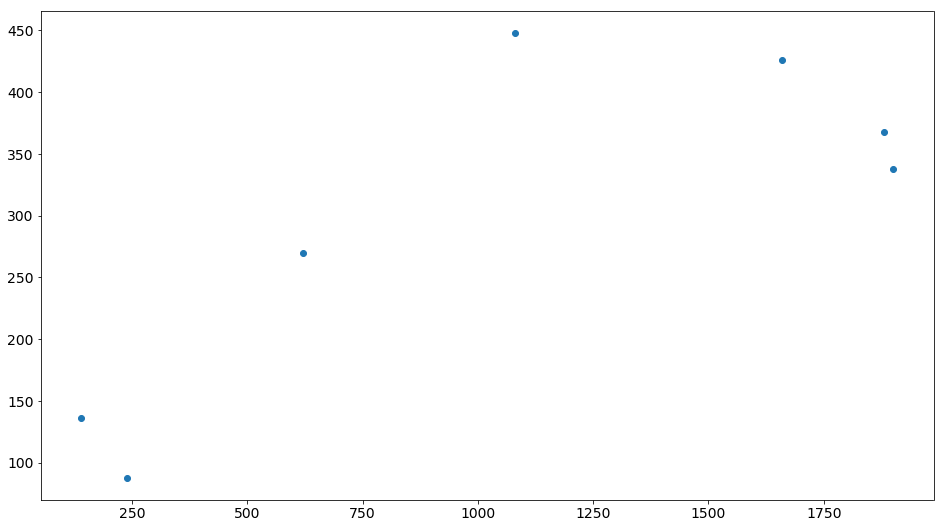

In [53]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2

# your code here
linear_model = LinearRegression()
plt.scatter(x, y)

### Doing Polynomial Regression

Next, let's implement a function that produces fitted polynomial regression models. Again, you don't need to worry too much about how this works.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def make_poly(x, y, degree=2):
    '''creates and returns a polynomial regression model fit with input data X and Y'''
    
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_model = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", LinearRegression())])

    return poly_model.fit(reshape(x), y)

### Problem 3.2

Let's try using the `make_poly` function.

**Try this!** Use `make_poly` to, well, make a polynomial regression model with a `degree` of 2. This model will fit the data with a quadratic function. Store the model you created in `poly2_model` and create a plot showing the scattered data points `x, y` and the predicted values of the model. Make sure your graph has the proper components. `HINT` you will need to make an array of equally spaced values over an interval (see [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)) for your predicted values; refer to `Lab4`.

ValueError: x and y must have same first dimension, but have shapes (1000,) and (102,)

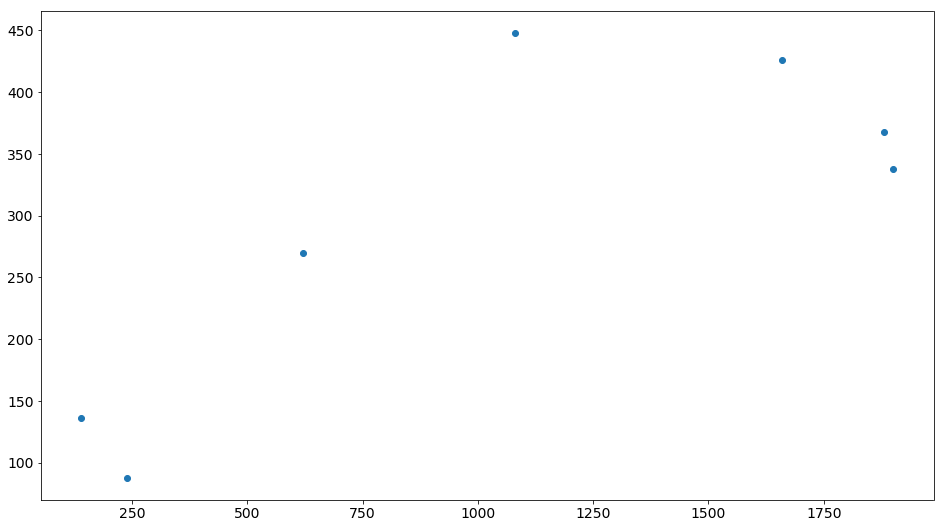

In [69]:
# your code here
x_star = np.linspace(0, x.max(), 1000)
plt.scatter(x, y)
plt.plot(x_star, y_prediction, color="orange")
poly2_model = make_poly(x, y)

### Problem 3.3

Nice that worked well! Let's up the complexity again. Try to play around with the degree and find the one that produces the "best-fitting" model.

**Try this!** Use `make_poly` and try to find the "best-fitting" model by expermenting with the `degree` argument. Store this model in `poly_best_model`. Then, create a plot showing the scattered data points `x, y` and the predicted values of the model. Make sure your graph has the proper components. `HINT` you can use the `r_squared` metric you implemented from before to evaluate the fit of your model.

In [ ]:
# your code here


### Evaluating the Models

Let's compare the RMSE and $R^2$ metrics for the models that we have produced.

### Problem 3.4

**Try this!** Fill in the following `for` loop to print out the RMSE and $R^2$ metrics for each model in `models`.

In [82]:
models = {
    'Linear': linear_model,
    #'2nd Order Polynomial': poly2_model,
    #'Best Fitting Polynomial': poly_best_model
}

for name, model in models.items():
    # your code here
    #print(rsme(linear_model))
    print(r_squared(linear_model.predict, linear_model.labels))

AttributeError: 'LinearRegression' object has no attribute 'labels'

### Problem 3.5

**Write-up!** What do you notice about the scores? Given these results, which model would you pick to deliver to a client? Why?

### Stacking Up Against the Real Function

What if I told you the true function was $$y = 0.15x + 20$$

The following function, `ground_truth`, will return `x` and `y` values produced by the true function with some added noise. We can use this to produce other points that could have been generated by the same function.

In [29]:
def ground_truth(n):
    '''returns N random samples from the function above'''
    
    w, b = 0.15, 20
    noise = np.random.rand(n) * 300
    x = np.random.randint(0, 2000, n)
    y = w * x + b + noise
    
    return x, y

### Problem 3.6

**Try this!** With `ground_truth`, make a plot that shows points these four things:
1. The points from the toy dataset
2. 200 points generated from the true function
3. The linear model
4. The "best-fit" polynomial model

You don't need to retrain the models for this part. To receive full points, ensure that your plot has all of the proper components, including a legend (see `Lab4` for an example of how to do this).

In [ ]:
# your code here


### Problem 3.7

**Write-up!** What happened in the plot from [Problem 3.6](#Problem-3.6)? What does the tell us about model complexity? Why must we be careful of the models that we use to analyze our data?

And we're done.